# Imports

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Create Data Set

In [54]:
data = pd.read_csv("practice_data.csv")
x_column = data["x"]
y_column = data["y"]

x_array = x_column.to_numpy()
y_array = np.round(y_column.to_numpy(), 2)


# Normalizing Data

In [55]:
def z_score(x,y):
    mu_x = np.mean(x)
    mu_y = np.mean(y)

    sd_x = np.std(x)
    sd_y = np.std(y)

    x_norm = (x - mu_x) / sd_x
    y_norm = (y - mu_y) / sd_y

    return x_norm, y_norm

# Normalize

In [56]:
x_norm, y_norm = z_score(x_array, y_array)

# Plot Data

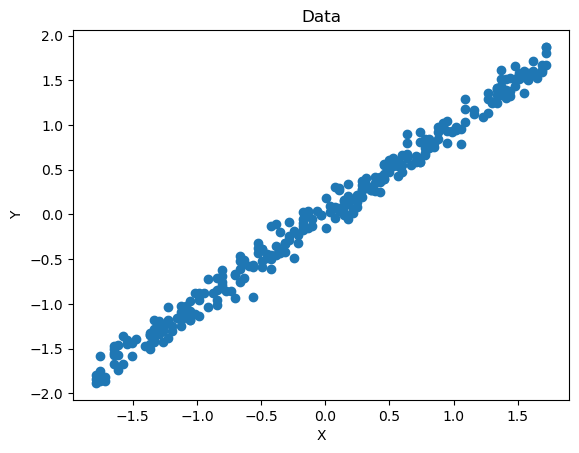

In [57]:
plt.plot(x_norm, y_norm, 'o')
plt.title("Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# some rows of data

In [58]:
data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


# Regression Algorithm (manual)


$${\color{orange}f_{w,b}(x) = wx +b}$$
$${\color{orange}J_{w,b}(x) = (1/2m)Σ_{i=1}^{m} (f_{w,b}(x^{ith})-y^{ith})^2}$$
$${\color{orange}repeat:}\\$$
$${\color{orange}w = w - alpha\ d/dw(J)}\\$$
$${\color{orange}b = b - alpha\ d/db(J)}\\$$
$${\color{orange} d/dw(J) = (1/m)Σ_{i=1}^{m} (f_{w,b}(x^{ith})-y^{ith})(x^{ith})}$$
$${\color{orange} d/db(J) = (1/m)Σ_{i=1}^{m} (f_{w,b}(x^{ith})-y^{ith})}$$

# Cost Function

In [59]:
def cost_function(x, y, w, b):
    m = len(x)
    sum = 0
    for i in range(m):
        sum += ((w * x[i] + b) - y[i]) ** 2
    return (1 / (2 * m)) * sum

# Compute Gradient

In [60]:
def compute_gradient(x, y, w, b):
    m = len(x)
    d_dw = 0
    d_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        error = f_wb - y[i]
        d_dw += error * x[i]
        d_db += error
    d_dw = d_dw / m
    d_db = d_db / m
    return d_dw, d_db

# Gradient Descent

In [61]:
def gradient_descent(
    x, y, w_in, b_in, iterations, a, cost_function=None, compute_gradient=None
):
    cost_history = {}

    w, b = w_in, b_in
    for _ in range(iterations):
        d_dw, d_db = compute_gradient(x, y, w, b)
        w -= a * d_dw
        b -= a * d_db

        # reporting
        if _ % 50 == 0:
            cost = cost_function(x,y,w,b)
            print(f"iteration: {_}\t|cost: {cost}")
            cost_history[_] = cost
        
    return w, b, cost_history

# Running Gradient Descent

In [62]:
w_in = 1
b_in = 1
iterations = 1_000
a = 1.0e-2
w, b, cost_history = gradient_descent(
    x_norm,
    y_norm,
    w_in,
    b_in,
    iterations,
    a,
    cost_function=cost_function,
    compute_gradient=compute_gradient,
)

iteration: 0	|cost: 0.4955047293638773
iteration: 50	|cost: 0.18481963332949436
iteration: 100	|cost: 0.07109884022933091
iteration: 150	|cost: 0.029473352079429617
iteration: 200	|cost: 0.014237077195280197
iteration: 250	|cost: 0.008660107827152468
iteration: 300	|cost: 0.00661875667212758
iteration: 350	|cost: 0.005871556129493013
iteration: 400	|cost: 0.00559805656547186
iteration: 450	|cost: 0.00549794687971599
iteration: 500	|cost: 0.005461303497054634
iteration: 550	|cost: 0.005447890833906933
iteration: 600	|cost: 0.005442981365412272
iteration: 650	|cost: 0.005441184341164765
iteration: 700	|cost: 0.005440526572172116
iteration: 750	|cost: 0.005440285807447724
iteration: 800	|cost: 0.0054401976797719565
iteration: 850	|cost: 0.005440165422192473
iteration: 900	|cost: 0.005440153614875125
iteration: 950	|cost: 0.005440149293015109


# Function

In [63]:
def f(x):
    return w*x+b

# Prediction

In [64]:
print(f"\n(w,b) -> ({w},{b})\n")

print(f"(x:77) ==> prediction: {f(77)}\t data(x:77) ==> {y_array[0]}")
print(f"(x:21) ==> prediction: {f(21)}\t data(x:21) ==> {y_array[1]}")
print(f"(x:22) ==> prediction: {f(22)}\t data(x:22) ==> {y_array[2]}")
print(f"(x:20) ==> prediction: {f(20)}\t data(x:20) ==> {y_array[3]}")
print(f"(x:36) ==> prediction: {f(36)}\t data(x:36) ==> {y_array[4]}")
print(f"(x:15) ==> prediction: {f(15)}\t data(x:15) ==> {y_array[5]}")
print(f"(x:62) ==> prediction: {f(62)}\t data(x:62) ==> {y_array[6]}")
print(f"(x:95) ==> prediction: {f(95)}\t data(x:95) ==> {y_array[7]}")
print(f"(x:20) ==> prediction: {f(20)}\t data(x:20) ==> {y_array[8]}")


(w,b) -> (0.9945452100512149,4.317124741059872e-05)

(x:77) ==> prediction: 76.58002434519096	 data(x:77) ==> 79.78
(x:21) ==> prediction: 20.88549258232292	 data(x:21) ==> 23.18
(x:22) ==> prediction: 21.880037792374136	 data(x:22) ==> 25.61
(x:20) ==> prediction: 19.890947372271707	 data(x:20) ==> 17.86
(x:36) ==> prediction: 35.803670733091145	 data(x:36) ==> 41.85
(x:15) ==> prediction: 14.918221322015635	 data(x:15) ==> 9.81
(x:62) ==> prediction: 61.661846194422736	 data(x:62) ==> 58.87
(x:95) ==> prediction: 94.48183812611282	 data(x:95) ==> 97.62
(x:20) ==> prediction: 19.890947372271707	 data(x:20) ==> 18.4


### Plot Output

Text(0.5, 1.0, 'cost per iteration')

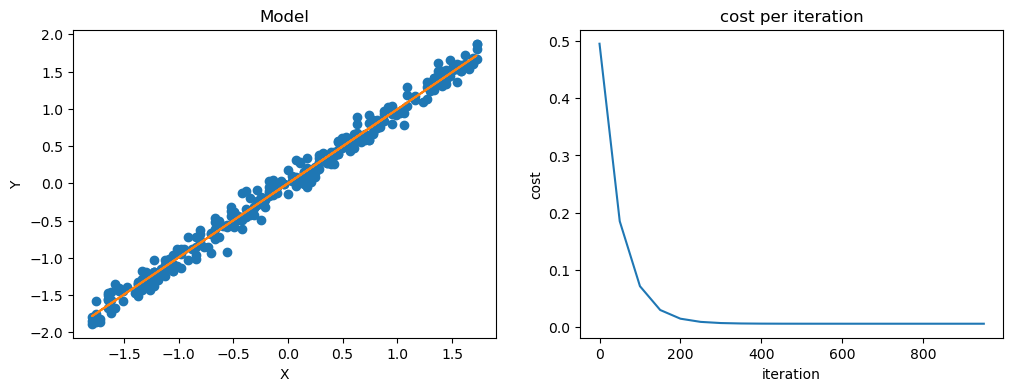

In [65]:
fig, (ex1, ex2) = plt.subplots(1,2, figsize=(12,4))

ex1.plot(x_norm,y_norm, 'o')
y_hat = w * x_norm + b
ex1.plot(x_norm, y_hat)
ex1.set_xlabel("X")
ex1.set_ylabel("Y")
ex1.set_title("Model")

ex2.plot(list(cost_history.keys()), list(cost_history.values()))
ex2.set_xlabel("iteration")
ex2.set_ylabel("cost")
ex2.set_title("cost per iteration")